<a href="https://colab.research.google.com/github/BhagwatiOracle/Dynamic-Pricing/blob/main/DynamicPricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('dynamic_pricing.csv')
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


# EDA

In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


**Univariate Analysis**

<Axes: xlabel='Location_Category', ylabel='count'>

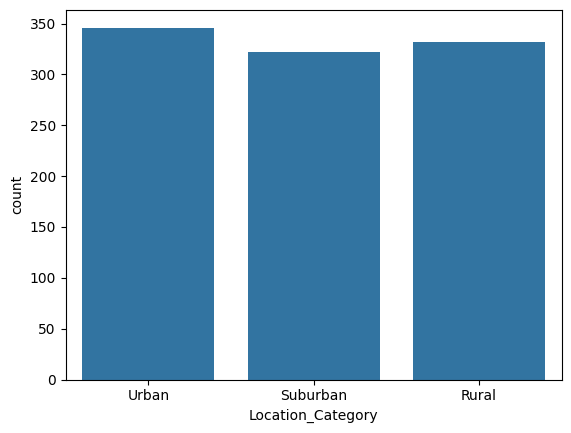

In [ ]:
## Univariate Analysis
sns.countplot(x=df['Location_Category'])

<Axes: xlabel='Customer_Loyalty_Status', ylabel='count'>

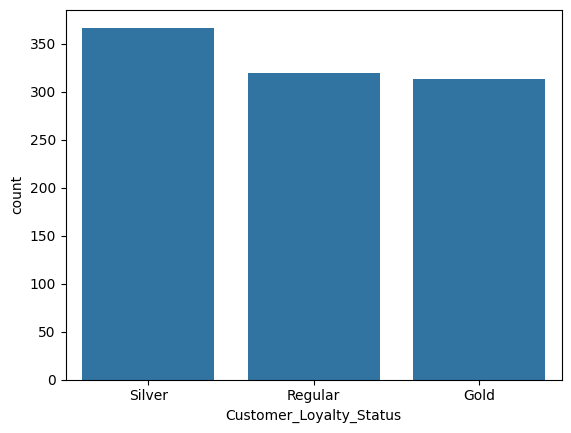

In [ ]:
sns.countplot(x=df['Customer_Loyalty_Status'])

<Axes: xlabel='Time_of_Booking', ylabel='count'>

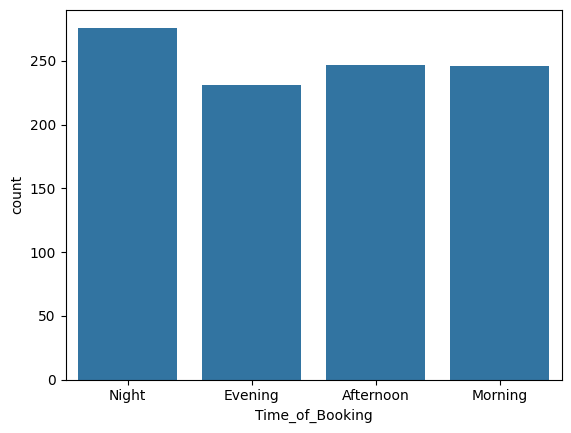

In [ ]:
sns.countplot(x=df['Time_of_Booking'])

<Axes: xlabel='Vehicle_Type', ylabel='count'>

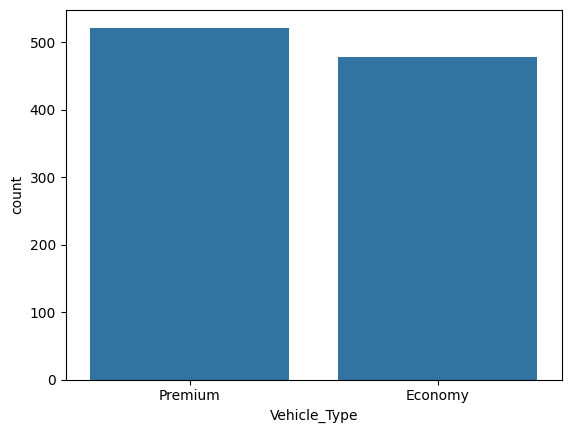

In [ ]:
sns.countplot(x=df['Vehicle_Type'])

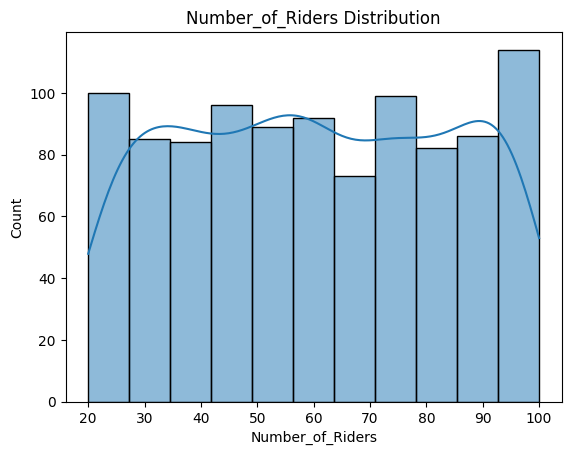

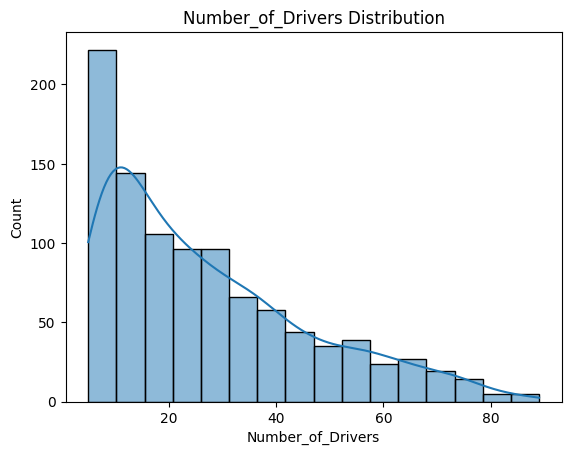

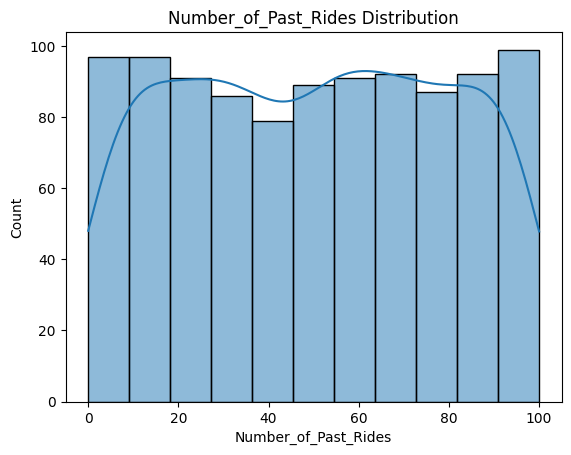

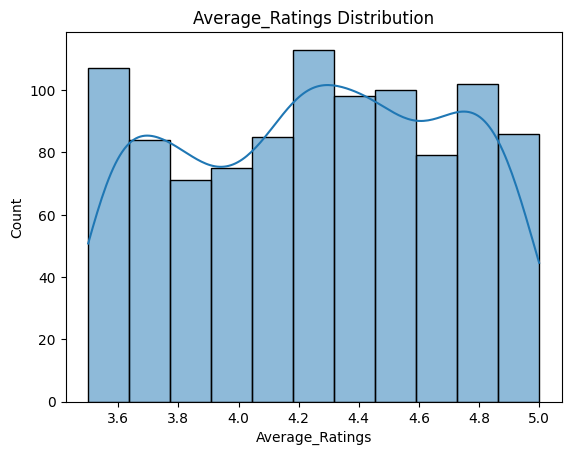

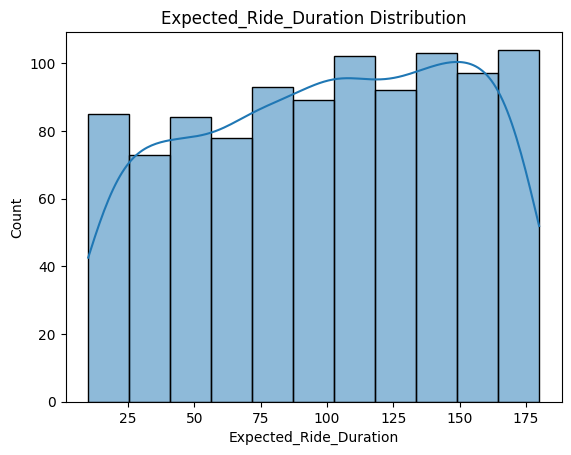

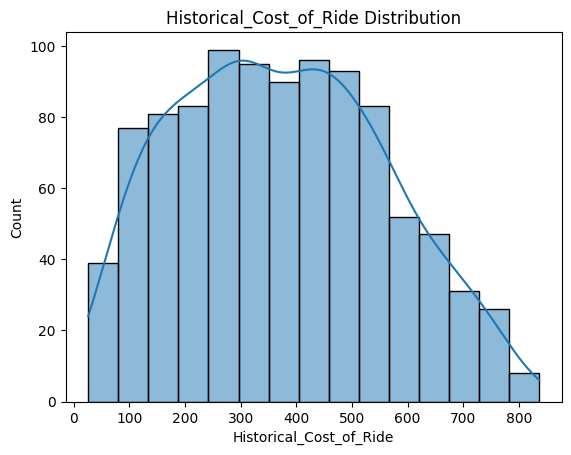

In [ ]:
features=df.select_dtypes(include=['int64','float64']).columns
for feature in features:
  sns.histplot(df[feature],kde=True)
  plt.title(f'{feature} Distribution')
  plt.xlabel(feature)
  plt.show()

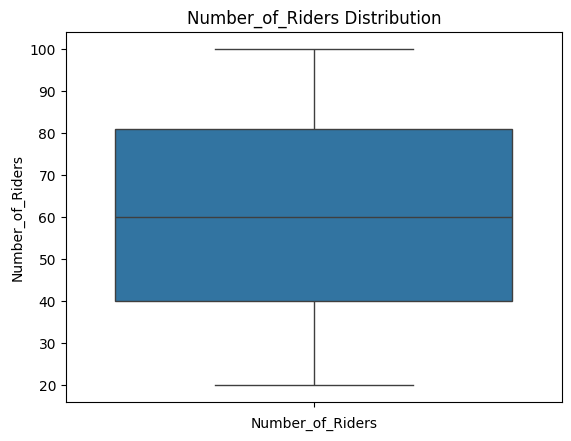

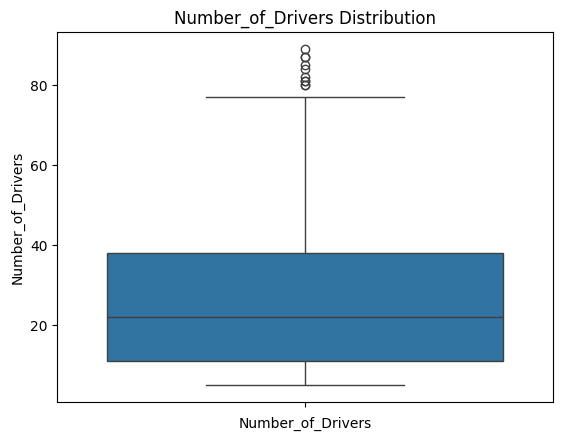

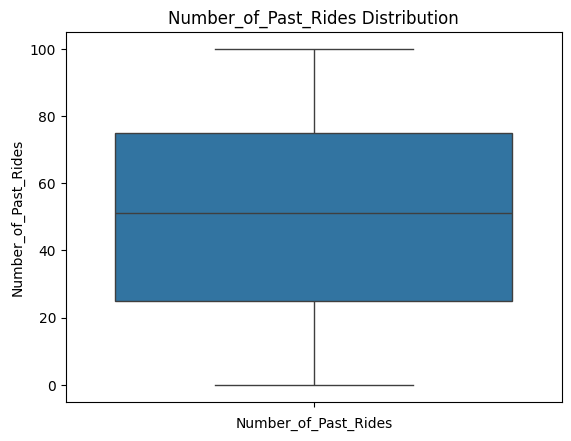

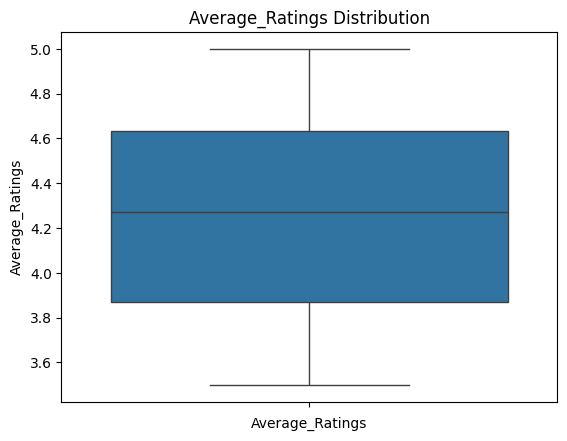

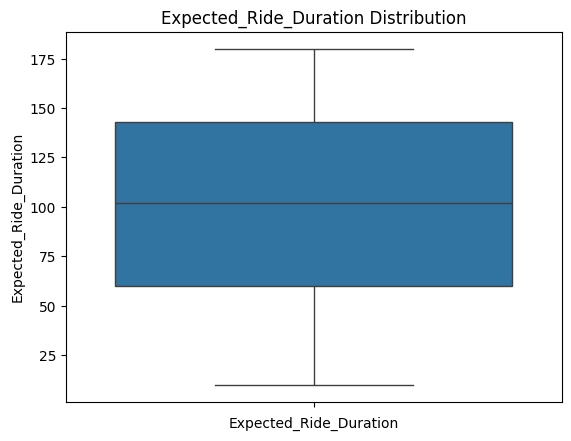

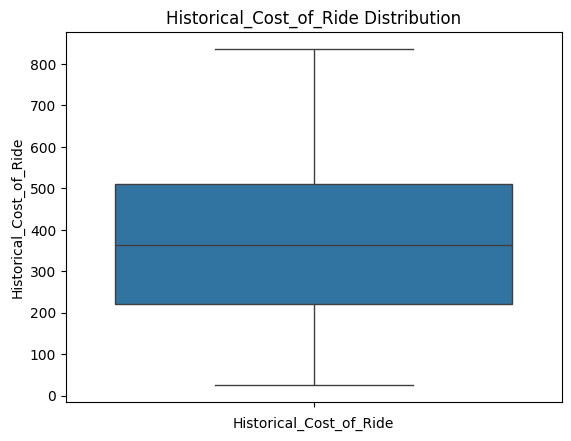

In [ ]:
for feature in features:
  sns.boxplot(df[feature])
  plt.title(f'{feature} Distribution')
  plt.xlabel(feature)
  plt.show()

**Multivariate Analysis**

<Axes: xlabel='Location_Category', ylabel='count'>

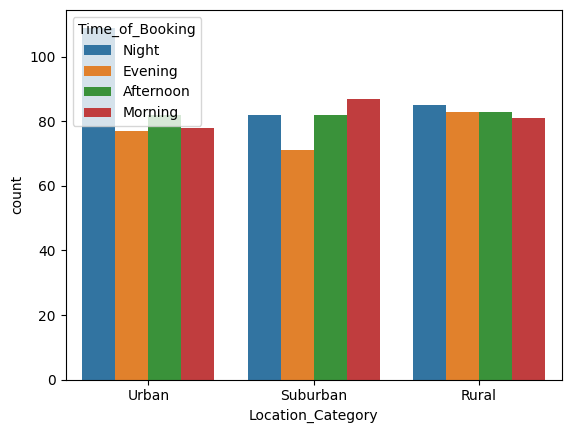

In [ ]:
sns.countplot(hue=df['Time_of_Booking'],x=df['Location_Category'])

<Axes: xlabel='Time_of_Booking', ylabel='count'>

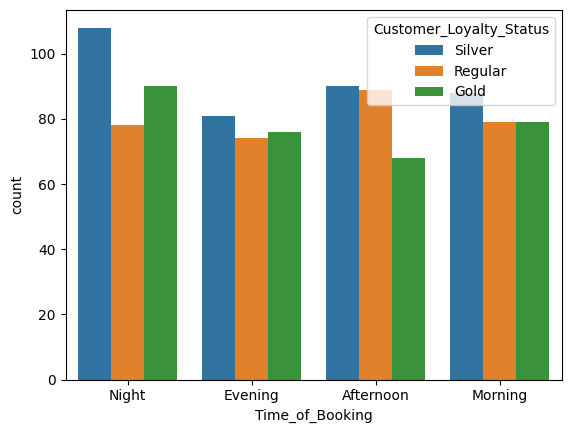

In [ ]:
sns.countplot(x=df['Time_of_Booking'],hue=df['Customer_Loyalty_Status'])

<Axes: xlabel='Time_of_Booking', ylabel='count'>

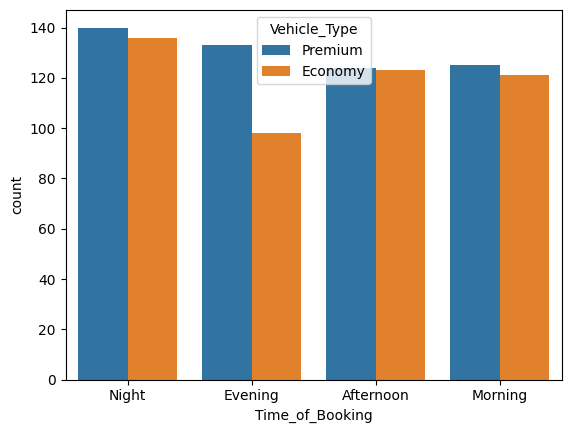

In [ ]:
sns.countplot(x=df['Time_of_Booking'],hue=df['Vehicle_Type'])

<Axes: xlabel='Location_Category', ylabel='count'>

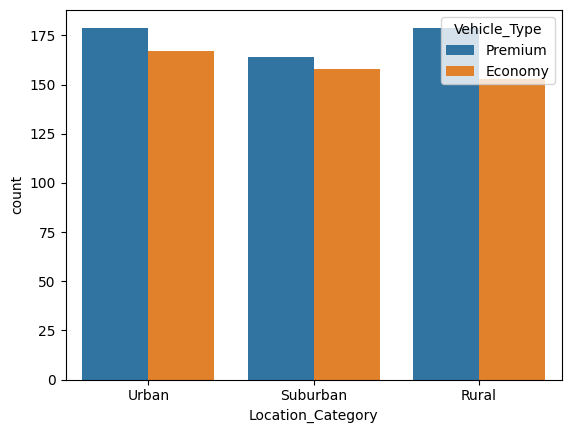

In [ ]:
sns.countplot(x=df['Location_Category'],hue=df['Vehicle_Type'])

<Figure size 1200x800 with 0 Axes>

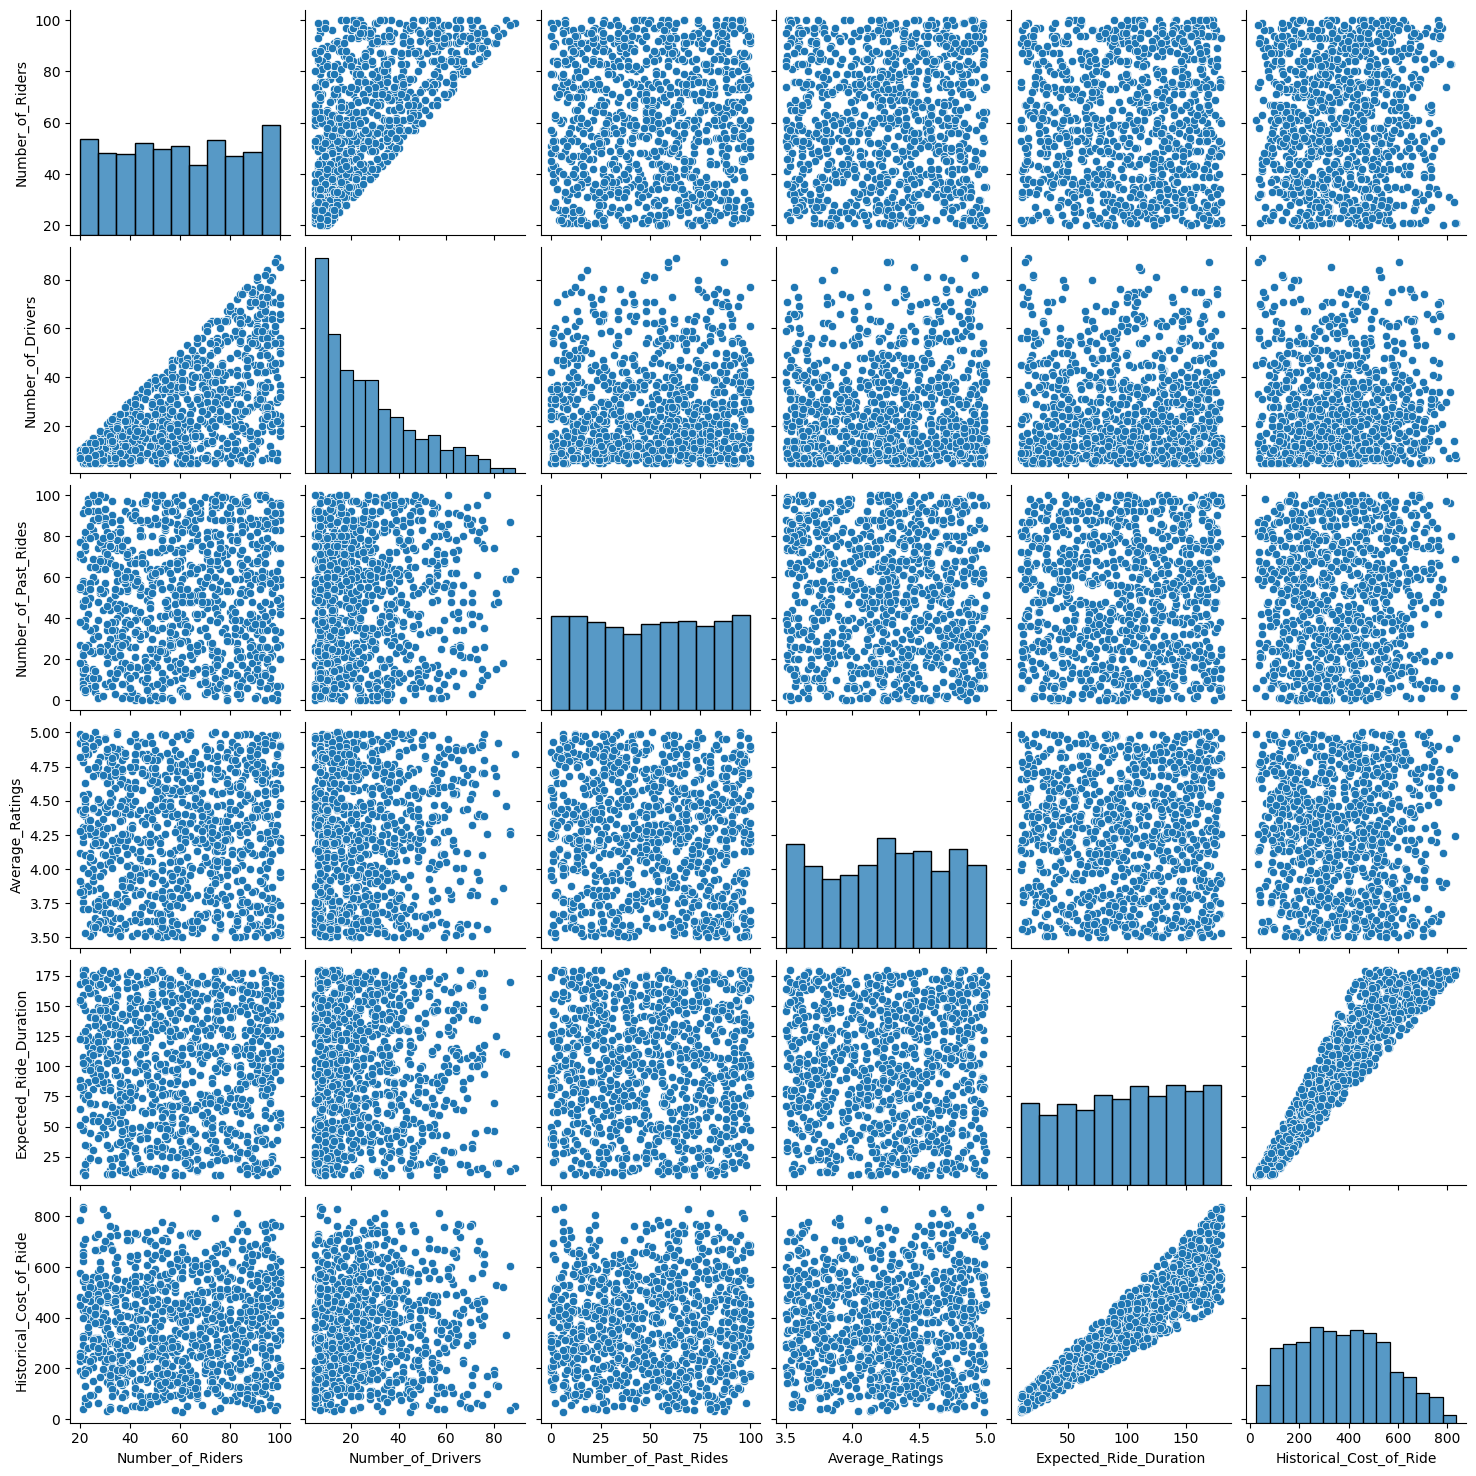

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

<Axes: >

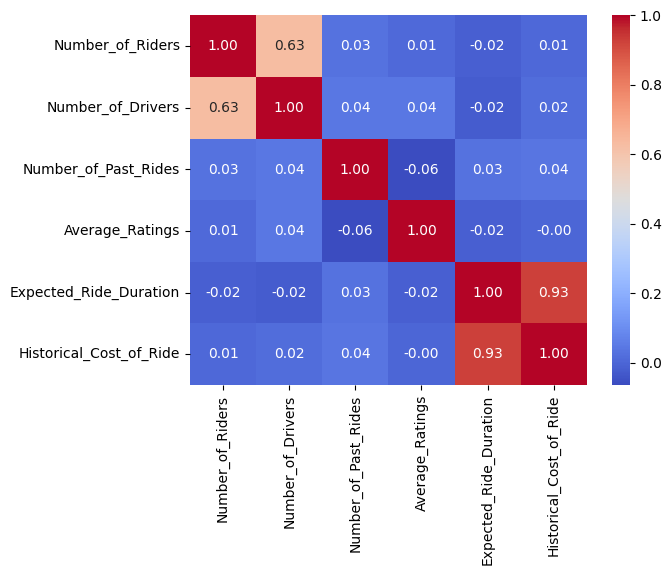

In [ ]:
numeric_cols=df.select_dtypes(include=['number']).columns
corr_matrix=df[numeric_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')

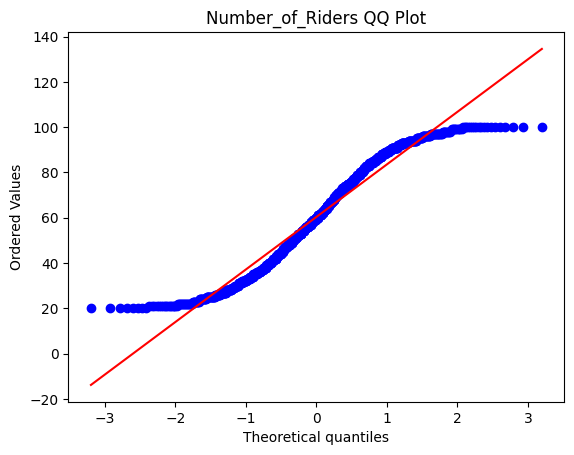

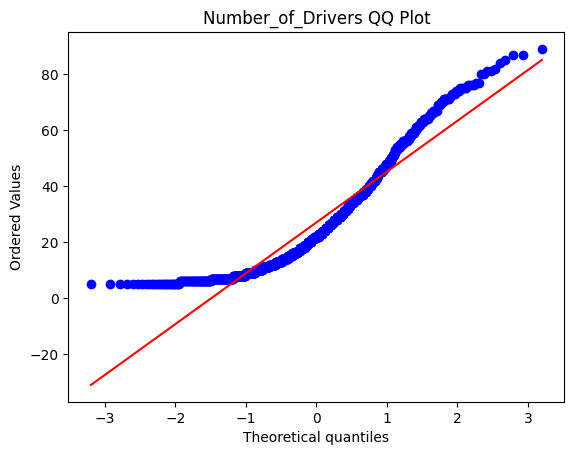

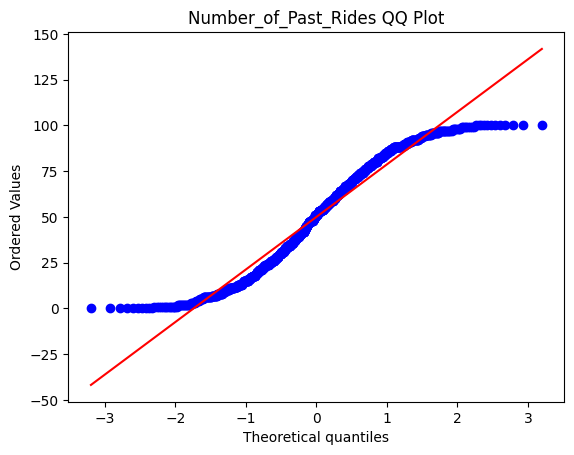

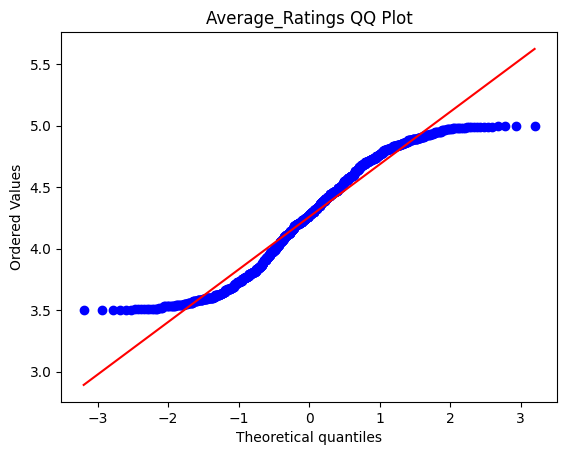

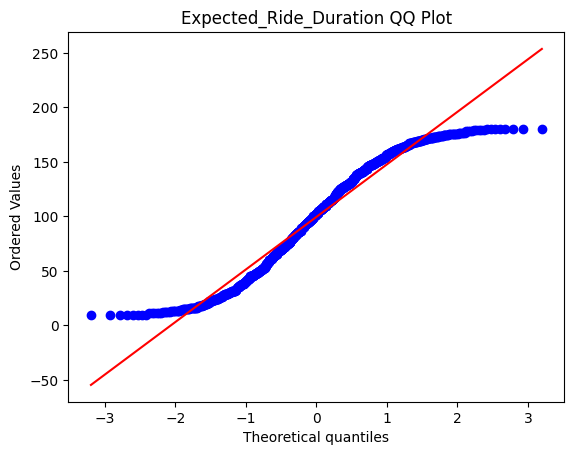

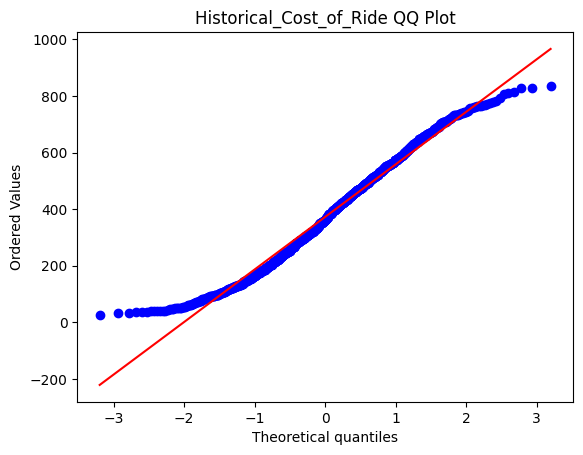

In [ ]:
import scipy.stats as stats
for col in numeric_cols:
  stats.probplot(df[col],dist='norm',plot=plt)
  plt.title(f'{col} QQ Plot')
  plt.show()

# Implementing a Dynamic Pricing Strategy

In [ ]:
high_demand_percentile=75
low_demand_percentile=25

df['demand_multiplier']=np.where(df['Number_of_Riders']>np.percentile(df['Number_of_Riders'],high_demand_percentile),
                                   df['Number_of_Riders']/np.percentile(df['Number_of_Riders'],high_demand_percentile),
                                   df['Number_of_Riders']/np.percentile(df['Number_of_Riders'],low_demand_percentile))

high_supply_percentile=75
low_supply_percentile=25

df['supply_multiplier']=np.where(df['Number_of_Drivers']>np.percentile(df['Number_of_Drivers'],low_supply_percentile),
                                   np.percentile(df['Number_of_Drivers'],high_supply_percentile)/df['Number_of_Drivers'],
                                   np.percentile(df['Number_of_Drivers'],low_supply_percentile)/df['Number_of_Drivers'])

demand_threshold_high=1.2
demand_threshold_low=0.8
supply_threshold_high=0.8
supply_threshold_low=1.2

df['adjusted_ride_cost']=df['Historical_Cost_of_Ride']*(
    np.maximum(df['demand_multiplier'],demand_threshold_low)*
    np.maximum(df['supply_multiplier'],supply_threshold_high)
)

([<matplotlib.patches.Wedge at 0x7e6c1bf6a2d0>,
 [Text(-0.9411872414630633, 0.569356282574584, 'Profit'),
  Text(0.9411872912377688, -0.5693562002933767, 'Loss')],
 [Text(-0.5133748589798527, 0.3105579723134095, '82.7%'),
  Text(0.513374886129692, -0.31055792743275096, '17.3%')])

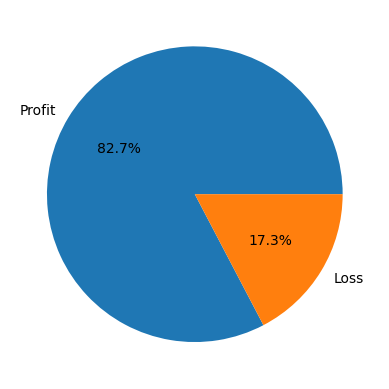

In [ ]:
df['Profit_percentage']=((df['adjusted_ride_cost'] - df['Historical_Cost_of_Ride'])/df['Historical_Cost_of_Ride'])*100

profitable_rides=df[df['Profit_percentage']>0]
loss_rides=df[df['Profit_percentage']<0]

profitable_count=len(profitable_rides)
loss_count=len(loss_rides)

values=[profitable_count,loss_count]
labels=['Profit','Loss']
plt.pie(values,labels=labels,autopct='%1.1f%%')

# Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
x=df[['Number_of_Riders','Number_of_Drivers','Vehicle_Type','Expected_Ride_Duration']]
y=df['adjusted_ride_cost']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
trf1=ColumnTransformer([
     ('ohe',OneHotEncoder(drop='first'),[2]),
 ],remainder='passthrough')


In [ ]:
trf2=ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,4))
],remainder='passthrough')

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def outlierRemoval(df):
  columns=pd.DataFrame(df).columns
  df=pd.DataFrame(df,columns=columns)
  numeric_cols=df.select_dtypes(include=['number']).columns

  for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lowerbound=Q1-1.5*IQR
    upperbound=Q3+1.5*IQR
    df[col]=np.where(df[col]>upperbound,upperbound,np.where(df[col]<lowerbound,lowerbound,df[col]))
  return df

iqr_transformer=FunctionTransformer(outlierRemoval)

trf3=ColumnTransformer([
    ('iqr',iqr_transformer,slice(0,5))
],remainder='passthrough')

In [ ]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

x_train=pipe.fit_transform(x_train)
x_test=pipe.transform(x_test)

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('R2 Score:',r2)


MSE: 90898.45306139514
R2 Score: 0.6031942183302612


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0,1,2,3,4,5,6,7,8,9,10]}
model2=Ridge()
grid_search=GridSearchCV(model2,param_grid,cv=5)
grid_search.fit(x_train,y_train)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('R2 Score:',r2)


MSE: 90898.45306139514
R2 Score: 0.6031942183302612


In [ ]:
from sklearn.ensemble import VotingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
estimator=[('lr',lr),('dt',dt),('rf',rf)]
model3=VotingRegressor(estimator)
param_grid={
    'dt__max_depth':[None,10,20,30],
    'rf__n_estimators':[10,50,100,200],
}
grid_search=GridSearchCV(model3,param_grid,cv=5)
grid_search.fit(x_train,y_train)
y_pred=grid_search.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('MSE:',mse)
print('R2 Score:',r2)

MSE: 42570.127791700994
R2 Score: 0.8141654531485014
